In [1]:
import torch, numpy as np, pandas as pd

In [28]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
train_df.describe(include = np.number)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
train_df.describe(include = 'object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [32]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
modes = train_df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [34]:
train_df.fillna(modes, inplace = True)

In [35]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: >

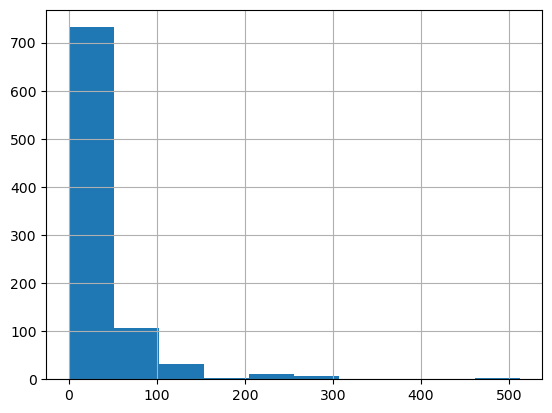

In [36]:
train_df['Fare'].hist()

In [37]:
train_df['LogFare'] = np.log(train_df.Fare + 1)

In [38]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,2.202765


In [39]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,LogFare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


<Axes: >

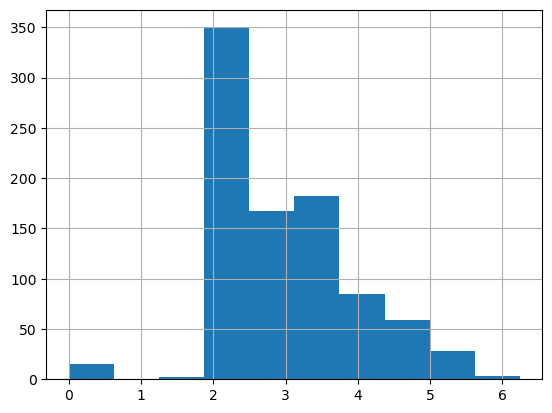

In [40]:
train_df['LogFare'].hist()

In [42]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LogFare'],
      dtype='object')

In [43]:
train_df = pd.get_dummies(train_df, columns = ['Pclass', 'Sex', 'Embarked'])
train_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,B96 B98,2.110213,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,4.280593,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,2.188856,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,3.990834,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,B96 B98,2.202765,0,0,1,0,1,0,0,1


In [45]:
added_cols = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
train_df[added_cols].head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [46]:
x = torch.tensor(train_df.Survived)

In [48]:
train_df[added_cols].values

array([[0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 1, 0]], dtype=uint8)

In [51]:
y_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols 
y_cols

['Age',
 'SibSp',
 'Parch',
 'LogFare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [53]:
y = torch.tensor(train_df[y_cols].values, dtype = torch.float)

In [54]:
y

tensor([[22.,  1.,  0.,  ...,  0.,  0.,  1.],
        [38.,  1.,  0.,  ...,  1.,  0.,  0.],
        [26.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [24.,  1.,  2.,  ...,  0.,  0.,  1.],
        [26.,  0.,  0.,  ...,  1.,  0.,  0.],
        [32.,  0.,  0.,  ...,  0.,  1.,  0.]])

In [56]:
x[:5]

tensor([0, 1, 1, 1, 0])

In [58]:
y.shape

torch.Size([891, 12])

In [60]:
values, indices = y.max(dim = 0)
values

tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000])

In [61]:
y = y / values

In [62]:
y

tensor([[0.2750, 0.1250, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 1.0000],
        ...,
        [0.3000, 0.1250, 0.3333,  ..., 0.0000, 0.0000, 1.0000],
        [0.3250, 0.0000, 0.0000,  ..., 1.0000, 0.0000, 0.0000],
        [0.4000, 0.0000, 0.0000,  ..., 0.0000, 1.0000, 0.0000]])

In [91]:
torch.manual_seed(442)

n_coeffs = y.shape[1]
coeffs = torch.rand(n_coeffs) - 0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625])

In [92]:
preds = (y * coeffs).sum(dim = 1)
preds[:10]

tensor([ 0.9436, -0.7465,  0.9339,  0.0830,  0.8477,  0.7575, -0.0771,  1.0984,
         0.9973, -0.6285])

In [93]:
loss = torch.abs(x - preds).mean()
loss

tensor(0.7086)

In [94]:
def calc_preds(coeff, y): return (y * coeff).sum(dim = 1)
def calc_loss(coeff, y, x): return torch.abs((calc_preds(coeff, y)) - x).mean()

In [95]:
calc_loss(coeffs, y, x)

tensor(0.7086)

In [96]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,
         0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [97]:
loss = calc_loss(coeffs, y, x)
loss

tensor(0.7086, grad_fn=<MeanBackward0>)

In [98]:
loss.backward()

In [99]:
coeffs.grad

tensor([-0.0081,  0.0194,  0.0067, -0.0253, -0.1773, -0.0516,  0.3199, -0.1526,
         0.2435, -0.0988,  0.0146,  0.1751])

In [100]:
loss = calc_loss(coeffs, y, x)
loss.backward()
coeffs.grad

tensor([-0.0161,  0.0387,  0.0135, -0.0506, -0.3547, -0.1033,  0.6397, -0.3053,
         0.4871, -0.1975,  0.0292,  0.3502])

In [110]:
coeffs.grad.zero_()

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [112]:
loss = calc_loss(coeffs, y, x)
loss.backward()
with torch.no_grad():
    coeffs.sub_(loss * 0.01)
    coeffs.grad.zero_()
    print(calc_loss(coeffs, y, x))

tensor(3.4958)


In [113]:
from fastai.data.transforms import RandomSplitter

train_split, val_split = RandomSplitter(seed = 42)(train_df)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [114]:
train_split

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [115]:
val_split

(#178) [303,778,531,385,134,476,691,443,386,128...]

In [116]:
x_train, x_val = x[train_split], x[val_split]
y_train, y_val = y[train_split], y[val_split]

In [117]:
len(x_train), len(x_val)

(713, 178)

In [118]:
def update_coeffs(coeff, lr):
    coeff.sub_(coeff.grad * lr)
    coeff.grad.zero_()

In [123]:
def one_epoch(coeff, lr):
    loss = calc_loss(coeff, y_train, x_train)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeff, lr)
    print(f'{loss:.3f}', end = '; ')

In [127]:
print('sonali', end = '; ')
print('behera')

sonali; behera


In [124]:
def init_coeffs():
    return (torch.rand(n_coeffs) - 0.5).requires_grad_()

In [121]:
def train_model(epochs = 30, lr = 0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr)
    return coeffs

In [129]:
coeffs = train_model(18, 0.2)

0.700; 0.653; 0.616; 0.581; 0.547; 0.514; 0.481; 0.448; 0.415; 0.384; 0.353; 0.323; 0.299; 0.280; 0.267; 0.266; 0.272; 0.296; 

In [130]:
def show_coeffs():
    return dict(zip(y_cols, coeffs.requires_grad_(False)))

In [131]:
show_coeffs()

{'Age': tensor(-0.3072),
 'SibSp': tensor(0.0876),
 'Parch': tensor(0.2315),
 'LogFare': tensor(0.0103),
 'Pclass_1': tensor(0.1452),
 'Pclass_2': tensor(0.0152),
 'Pclass_3': tensor(-0.0599),
 'Sex_female': tensor(0.8151),
 'Sex_male': tensor(-0.0309),
 'Embarked_C': tensor(0.0708),
 'Embarked_Q': tensor(0.1693),
 'Embarked_S': tensor(0.0843)}

In [134]:
preds = calc_preds(coeffs, y_val)

In [139]:
x_val[:10]

tensor([1, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [138]:
preds[:10]

tensor([ 0.9117, -0.0101, -0.1088,  0.0065, -0.0232, -0.0460,  0.8536,  0.8113,
         0.1278,  0.7885])

In [147]:
(x_val.bool() == (preds > 0.5)).float().mean()

tensor(0.7921)

In [148]:
def acc(coeffs):
    preds = calc_preds(coeffs, y_val)
    return (x_val.bool() == (preds > 0.5)).float().mean()

In [149]:
acc(coeffs)

tensor(0.7921)

In [150]:
import sympy

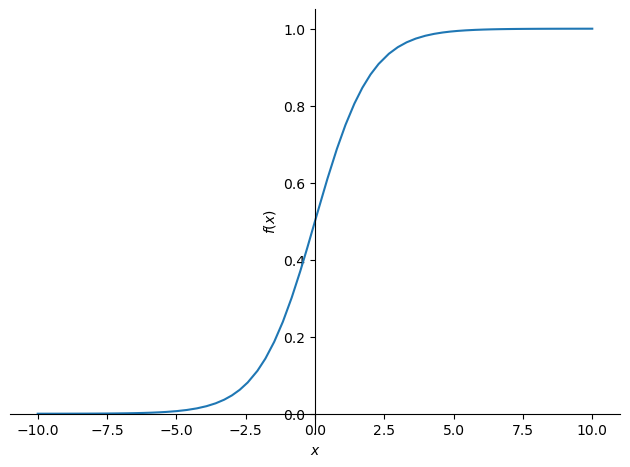

In [153]:
sympy.plot('1/(1 + exp(-x))')

In [155]:
def calc_preds(coeffs, y):
    return torch.sigmoid((coeffs * y).sum(dim = 1))

In [157]:
coeffs = train_model(lr = 100)

0.559; 0.311; 0.209; 0.203; 0.200; 0.199; 0.198; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [158]:
acc(coeffs)

tensor(0.8258)

In [159]:
show_coeffs()

{'Age': tensor(-1.4362),
 'SibSp': tensor(-1.3754),
 'Parch': tensor(-0.5818),
 'LogFare': tensor(0.1428),
 'Pclass_1': tensor(2.7471),
 'Pclass_2': tensor(2.0513),
 'Pclass_3': tensor(-6.0435),
 'Sex_female': tensor(8.2482),
 'Sex_male': tensor(-8.8095),
 'Embarked_C': tensor(1.3807),
 'Embarked_Q': tensor(2.0842),
 'Embarked_S': tensor(-4.4859)}

In [160]:
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [162]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [164]:
modes = test_df.mode().iloc[0]
modes

PassengerId                              892
Pclass                                   3.0
Name           Abbott, Master. Eugene Joseph
Sex                                     male
Age                                     21.0
SibSp                                    0.0
Parch                                    0.0
Ticket                              PC 17608
Fare                                    7.75
Cabin                        B57 B59 B63 B66
Embarked                                   S
Name: 0, dtype: object

In [165]:
test_df.fillna(modes, inplace = True)

In [166]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [167]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,28.364833,0.447368,0.392344,35.560497
std,120.810458,0.841838,13.180116,0.896760,0.981429,55.857145
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [171]:
test_df['LogFare'] = np.log(test_df.Fare + 1)

In [172]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,LogFare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,28.364833,0.447368,0.392344,35.560497,3.014060
std,120.810458,0.841838,13.180116,0.896760,0.981429,55.857145,0.967724
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,2.185579
50%,1100.500000,3.000000,24.000000,0.000000,0.000000,14.454200,2.737881
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.471875,3.480373
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,6.240917


In [173]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LogFare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q,2.178064
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S,2.079442
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q,2.369075
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S,2.268252
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S,2.586824


In [175]:
added_cols

['Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [176]:
test_df = pd.get_dummies(test_df, columns=["Sex","Pclass","Embarked"])
test_df.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,LogFare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,B57 B59 B63 B66,2.178064,0,1,0,0,1,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,B57 B59 B63 B66,2.079442,1,0,0,0,1,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,B57 B59 B63 B66,2.369075,0,1,0,1,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,B57 B59 B63 B66,2.268252,0,1,0,0,1,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2.586824,1,0,0,0,1,0,0,1


In [180]:
y_test = torch.tensor(test_df[y_cols].values, dtype = torch.float)
y_test

tensor([[34.5000,  0.0000,  0.0000,  ...,  0.0000,  1.0000,  0.0000],
        [47.0000,  1.0000,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [62.0000,  0.0000,  0.0000,  ...,  0.0000,  1.0000,  0.0000],
        ...,
        [38.5000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [21.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  1.0000],
        [21.0000,  1.0000,  1.0000,  ...,  1.0000,  0.0000,  0.0000]])

**Using Matrix Multiplication**

In [181]:
def calc_preds(coeffs, y): return torch.sigmoid(y@coeffs)

In [182]:
calc_preds(coeffs, y_test)

tensor([1.1776e-27, 1.6813e-31, 0.0000e+00, 7.9648e-26, 3.9596e-16, 1.0308e-17,
        1.9249e-17, 1.8226e-22, 2.8886e-10, 3.2228e-23, 4.3494e-22, 8.5464e-34,
        1.4393e-12, 0.0000e+00, 1.4809e-27, 5.1764e-11, 1.9966e-24, 1.5185e-19,
        5.0933e-19, 4.1684e-27, 2.0829e-37, 6.6608e-15, 8.8089e-11, 7.4490e-16,
        2.6676e-26, 0.0000e+00, 4.5397e-09, 1.7612e-20, 1.1481e-30, 1.1212e-20,
        3.4462e-37, 1.4739e-21, 3.2659e-23, 1.0151e-15, 8.1317e-22, 5.5050e-18,
        1.1157e-14, 1.1262e-14, 1.4249e-24, 5.6774e-22, 5.4500e-31, 3.3594e-18,
        1.4572e-34, 9.4749e-17, 2.5629e-26, 1.3922e-24, 1.2921e-30, 3.0958e-19,
        1.6623e-32, 1.6788e-24, 1.2795e-20, 9.9070e-20, 6.3092e-12, 2.5767e-17,
        5.5004e-16, 6.1166e-15, 8.0578e-31, 1.3860e-24, 1.2068e-22, 1.8460e-17,
        1.3594e-19, 2.1049e-25, 3.2254e-20, 1.8833e-12, 3.1911e-12, 4.1511e-11,
        5.9011e-10, 2.1751e-34, 6.9363e-22, 1.3836e-36, 1.0657e-13, 4.3494e-22,
        1.1399e-19, 2.5044e-20, 7.5274e-

In [183]:
def init_coeffs(): return (torch.rand(n_coeffs, 1) - 0.5).requires_grad_()

In [185]:
x_train.shape

torch.Size([713])

In [186]:
x_train = x_train[:, None]
x_val = x_val[:, None]

In [187]:
x_train.shape

torch.Size([713, 1])

In [188]:
coeffs = train_model(lr = 100)

0.559; 0.311; 0.209; 0.203; 0.200; 0.199; 0.198; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [189]:
acc(coeffs)

tensor(0.8258)

**Neural Network with 1 hidden layer**

In [191]:
(torch.rand(3, 3) - 0.5) / 3

tensor([[ 0.1044, -0.0496, -0.0850],
        [ 0.1109,  0.0431,  0.0787],
        [-0.0874,  0.1350, -0.0891]])

In [196]:
torch.rand(1)[0]

tensor(0.7834)

In [216]:
def init_coeffs(n_hidden = 20):
    layer1 = (torch.rand(n_coeffs, n_hidden) - 0.5) / n_hidden
    layer2 = torch.rand(n_hidden , 1) - 0.3
    const = torch.rand(1)[0]
    
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

In [208]:
a, b, c = coeffs_init()

In [212]:
import torch.nn.functional as F

def calc_preds(coeffs, y):
    layer1, layer2, const = coeffs
    res = F.relu(y @ layer1)
    res = res @ layer2 + const
    return torch.sigmoid(res)

In [213]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [217]:
coeffs = train_model(lr=20)

0.543; 0.416; 0.268; 0.414; 0.219; 0.213; 0.206; 0.196; 0.195; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [218]:
acc(coeffs)

tensor(0.8258)